In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle
df = pd.read_csv('spotify.csv')
pd.set_option('display.max_columns',21)

In [2]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
drop_genre = ['afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film',
       'power-pop', 'progressive-house', 'psych-rock', 'punk-rock',
       'punk', 'reggae', 'reggaeton', 'rock-n-roll', 
       'rockabilly', 'sad', 'salsa', 'samba', 'sertanejo',
       'show-tunes', 'singer-songwriter', 'ska', 'sleep', 'songwriter',
       'soul', 'spanish', 'study', 'swedish', 'synth-pop', 'tango',
       'techno', 'trance', 'trip-hop', 'turkish', 'world-music']


In [4]:
sub_df = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','popularity','explicit','key','mode','time_signature'])
sub_df.drop(sub_df[sub_df['track_genre'].isin(drop_genre)].index,inplace=True)
sub_df = sub_df.reset_index(drop=True)
sub_df.columns , sub_df.shape , sub_df['track_genre'].unique()

(Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'track_genre'],
       dtype='object'),
 (10000, 11),
 array(['acoustic', 'classical', 'club', 'drum-and-bass', 'jazz', 'metal',
        'pop', 'r-n-b', 'rock', 'romance'], dtype=object))

In [5]:
X = sub_df[['duration_ms','danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
y = sub_df[['track_genre']]

X

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917
1,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489
2,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332
3,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740
4,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949
...,...,...,...,...,...,...,...,...,...,...
9995,204160,0.276,0.1180,-18.853,0.1010,0.9820,0.000000,0.1290,0.214,66.706
9996,304973,0.326,0.2320,-13.969,0.2220,0.9690,0.000003,0.1060,0.269,78.036
9997,186693,0.509,0.2610,-8.962,0.0513,0.9770,0.002850,0.1090,0.173,133.327
9998,125613,0.427,0.2340,-12.942,0.0406,0.8800,0.000000,0.0784,0.410,91.069


In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction import DictVectorizer
scaler , encoder = StandardScaler(),LabelEncoder()
vectorizer = DictVectorizer(sparse=False)

In [7]:
X = scaler.fit_transform(X)
y = encoder.fit_transform(y)

a = [274192, 0.898, 0.472, -7.001, 0.0776, 0.0107, 0, 0.141, 0.214, 101.061]
print(a)
a = scaler.transform([a])
print(a)

# pickle_out = open("standardscaler", "wb")
# pickle.dump(scaler, pickle_out)
# pickle_out.close()

[274192, 0.898, 0.472, -7.001, 0.0776, 0.0107, 0, 0.141, 0.214, 101.061]
[[ 0.47197391  2.37977189 -0.31886889  0.37283282  0.11994594 -1.05933263
  -0.52001202 -0.31587192 -0.93448531 -0.66364709]]


/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/harmeharsingh/Documents/Programs/Machine Learning/test/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
len(x_train),len(x_test), len(y_train), len(y_test)

(7000, 3000, 7000, 3000)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=13,min_samples_leaf=37)

In [10]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=37)

In [11]:
# pickle_out = open("dt_genre_classifier", "wb")
# pickle.dump(classifier, pickle_out)
# pickle_out.close()

In [12]:
y_pred = classifier.predict_proba(x_test)
print(roc_auc_score(y_test, y_pred, multi_class='ovr'))

0.8674346658931931


In [13]:
tree_predictions = classifier.predict(x_test)
print(classification_report(y_test,tree_predictions))
print(accuracy_score(y_test,tree_predictions))

              precision    recall  f1-score   support

           0       0.44      0.37      0.40       306
           1       0.76      0.73      0.74       294
           2       0.47      0.47      0.47       310
           3       0.73      0.71      0.72       280
           4       0.60      0.53      0.56       311
           5       0.53      0.62      0.57       292
           6       0.41      0.51      0.45       321
           7       0.49      0.35      0.41       312
           8       0.36      0.43      0.39       296
           9       0.57      0.57      0.57       278

    accuracy                           0.53      3000
   macro avg       0.54      0.53      0.53      3000
weighted avg       0.53      0.53      0.53      3000

0.527


<Axes: >

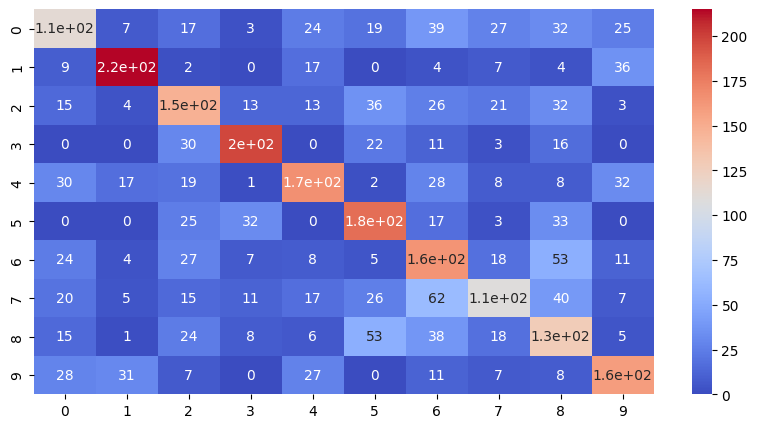

In [14]:
cm = confusion_matrix(y_test,tree_predictions)
plt.figure(figsize=(10,5))
sns.heatmap(cm,cmap='coolwarm',annot=True)

[Text(0.7020471643518519, 0.9642857142857143, 'x[5] <= 0.772\ngini = 0.9\nsamples = 7000\nvalue = [694, 706, 690, 720, 689, 708, 679, 688, 704, 722]'),
 Text(0.5014322916666667, 0.8928571428571429, 'x[9] <= 1.508\ngini = 0.872\nsamples = 4638\nvalue = [356.0, 53.0, 646.0, 720.0, 223.0, 708.0, 579.0, 587.0\n674.0, 92.0]'),
 Text(0.6017397280092593, 0.9285714285714286, 'True  '),
 Text(0.3510127314814815, 0.8214285714285714, 'x[5] <= -1.018\ngini = 0.868\nsamples = 3878\nvalue = [338, 46, 604, 251, 202, 649, 532, 554, 612, 90]'),
 Text(0.17337962962962963, 0.75, 'x[6] <= 1.134\ngini = 0.774\nsamples = 1371\nvalue = [47, 4, 291, 168, 9, 504, 63, 68, 216, 1]'),
 Text(0.11712962962962963, 0.6785714285714286, 'x[1] <= 0.73\ngini = 0.752\nsamples = 1132\nvalue = [46, 3, 151, 102, 7, 478, 62, 68, 214, 1]'),
 Text(0.0712962962962963, 0.6071428571428571, 'x[5] <= -1.084\ngini = 0.686\nsamples = 909\nvalue = [40, 3, 79, 71, 4, 459, 21, 48, 183, 1]'),
 Text(0.02962962962962963, 0.5357142857142857,

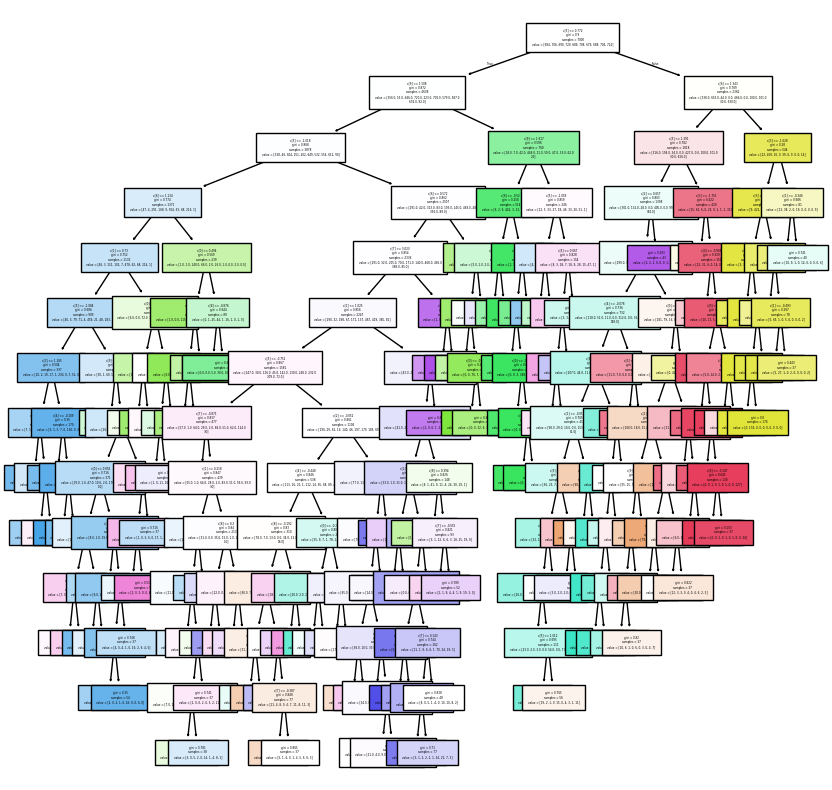

In [15]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(classifier,filled=True,fontsize=2)

In [16]:
depth = np.arange(2,30)
for d in depth:
    dec_tree = DecisionTreeClassifier(max_depth=d)
    dec_tree.fit(x_train,y_train)
    tpred = dec_tree.predict_proba(x_test)
    print(d,"\t",roc_auc_score(y_test,tpred,multi_class='ovr'))

2 	 0.7260609145460786
3 	 0.790669920389371
4 	 0.813911418737572
5 	 0.8255165132574497
6 	 0.8378439124254518
7 	 0.847432941527626
8 	 0.8446194002153209
9 	 0.8392635191455684
10 	 0.8332369579930348
11 	 0.8329417058420265
12 	 0.816812108550851
13 	 0.8123820772476551
14 	 0.80637898040127
15 	 0.7932553614582362
16 	 0.7843092209295265
17 	 0.7854496516889438
18 	 0.7726039166221282
19 	 0.7713863254555491
20 	 0.7714757892786539
21 	 0.767468694405465
22 	 0.7656922642204733
23 	 0.7628444412569007
24 	 0.7630981597545158
25 	 0.7628329283547786
26 	 0.7662464636860975
27 	 0.7603992898215717
28 	 0.7630440573370882
29 	 0.7616147640360846


In [17]:
score = []
deep = np.arange(6,14)
for depth in deep:
    for samples in [20,25,26,27,30,32,35,37,40,43,45,50]:
        dec_tree = DecisionTreeClassifier(max_depth=depth,min_samples_leaf=samples)
        dec_tree.fit(x_train,y_train)
        tpred = dec_tree.predict_proba(x_test)
        acc_score = roc_auc_score(y_test,tpred,multi_class='ovr')
        score.append((depth,samples,acc_score))

In [18]:
cols = ['max depth','min_samples_leaf','accuracy']
score_df = pd.DataFrame(score,columns=cols)
df_scores_pivot = score_df.pivot(index='min_samples_leaf', columns=['max depth'], values=['accuracy'])
df_scores_pivot

accuracy                                                    \
max depth               6         7         8         9         10        11   
min_samples_leaf                                                               
20                0.837134  0.850217  0.859054  0.860428  0.861392  0.864275   
25                0.837772  0.850630  0.859857  0.861343  0.862540  0.865475   
26                0.838050  0.850798  0.859854  0.861528  0.863408  0.865993   
27                0.837632  0.850511  0.859968  0.861658  0.863442  0.866522   
30                0.837965  0.851446  0.860304  0.863312  0.864825  0.865799   
32                0.838374  0.851450  0.860516  0.863392  0.864177  0.865171   
35                0.838250  0.850790  0.858787  0.861743  0.862816  0.864344   
37                0.838923  0.851655  0.859957  0.862814  0.864191  0.866318   
40                0.837956  0.851080  0.858386  0.861770  0.862876  0.864902   
43                0.837754  0.850498  0.858003  0.860952  0.861559  0.862973   
45                0.840209  0.851286  0.857852  0.859860  0.859419  0.860780   
50                0.839781  0.851021  0.857334  0.858808  0.859338  0.860900   

                                      
max depth               12        13  
min_samples_leaf                      
20                0.863660  0.862927  
25                0.864970  0.863981  
26                0.864769  0.864859  
27                0.865053  0.864536  
30                0.866752  0.866967  
32                0.866097  0.866459  
35                0.865125  0.865591  
37                0.867384  0.867435  
40                0.866660  0.866778  
43                0.865178  0.864925  
45                0.862314  0.861836  
50                0.861303  0.861250

depth=13 min_samples_leaf=32 acc=83.394